In [1]:
# Import Python libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
raw_data = pd.read_csv('QueryResults.csv')

In [3]:
raw_data

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How to generate a core dump in Linux on a segm...,<p>I have a process in Linux that's getting a ...,<linux><bash><unix><coredump><tcsh>,17965,237,413734,112,13
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7542,11,5
2,Can I use autolayout to provide different cons...,<p>Is it possible to change the constraints wh...,<ios><cocoa-touch><uiview><uiviewcontroller><a...,17772922,48,27364,13,6
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59330,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56684,42,7
...,...,...,...,...,...,...,...,...
27044,How to allow all Network connection types HTTP...,"<p>From Android 9 Pie now, requests without en...",<java><android><kotlin><android-9.0-pie><andro...,51902629,192,171293,65,9
27045,React Router v4 - Keep scrolling position when...,<p>I have two <code>&lt;Route&gt;</code>s crea...,<javascript><reactjs><scrollview><react-router...,51906708,28,22302,12,5
27046,SSL_ERROR_SSL(1): operation failed within the ...,<p>I am getting some <code>SSL Error</code>s (...,<ios><swift><alamofire><spotify><boringssl>,51912404,46,32158,14,2
27047,javax.xml.bind.JAXBException Implementation of...,<p>I'm trying to run my Spring Boot applicatio...,<xml><exception><jaxb><bind><java-9>,51916221,95,135417,15,1


## Nettoyage du texte

In [4]:

# Tokenizer
import nltk
import re
import inflect
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('wordnet')



def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)
    #lem_w = replace_numbers(lem_w)    
    #lem_w = remove_URL(lem_w)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aeorn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aeorn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#raw_data=raw_data[0:50]

In [6]:
data = raw_data.copy()

# traitement des tags :
data['Tags'] = raw_data['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))
data['Tags'] = data['Tags'].str[:-1]


# df nettoyé avec lemmatization :

data['Title'] = data['Title'].apply(lambda x : transform_bow_lem_fct(x))
data['Body'] = data['Body'].apply(lambda x : transform_bow_lem_fct(x))

data.head(50)


,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how generate core dump linux segmentation fault,process linux getting segmentation fault how t...,"linux,bash,unix,coredump,tcsh",17965,237,413734,112,13
1,dealing php server mysql server different time...,for use standard shared hosting package godadd...,"php,mysql,datetime,date,timezone",18449,12,7542,11,5
2,can use autolayout provide different constrain...,possible change constraint device rotated how ...,"ios,cocoa-touch,uiview,uiviewcontroller,autola...",17772922,48,27364,13,6
3,loading system.servicemodel configuration sect...,using .net 3.5 wcf trying write wcf configurat...,"c#,.net,xml,wcf,configurationmanager",19589,64,59330,16,5
4,xml serialization inherited type,following href= stackoverflow.com question 194...,"c#,xml,inheritance,serialization,xml-serializa...",20084,86,56684,42,7
5,myisam versus innodb,working project involves lot database writes s...,"mysql,database,performance,innodb,myisam",20148,886,301664,390,25
6,recommended sql database design tag tagging,'ve heard way implement tagging using mapping ...,"sql,database-design,tags,data-modeling,tagging",20856,324,116427,306,6
7,specifying mysql enum django model,how specifying using enum django model,"python,mysql,django,django-models,enums",21454,99,61017,21,9
8,what difference include filename include filename,programming language difference using angle br...,"c++,c,include,header-files,c-preprocessor",21593,2805,749204,685,31
9,.net get protocol host port,simple way .net quickly get current protocol h...,".net,asp.net,url,uri,authority",21640,253,177401,41,7


Analyse des tag :

In [7]:
def count_split_tags(df, column, separator):

    list_words = []
    for word in df[column].str.split(separator):
        list_words.extend(word)
    df_list_words = pd.DataFrame(list_words, columns=["Tag"])
    df_list_words = df_list_words.groupby("Tag")\
        .agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    df_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return df_list_words

In [8]:
tags_list = count_split_tags(df=data, column='Tags', separator=',')
tags_list.shape[0]

12387

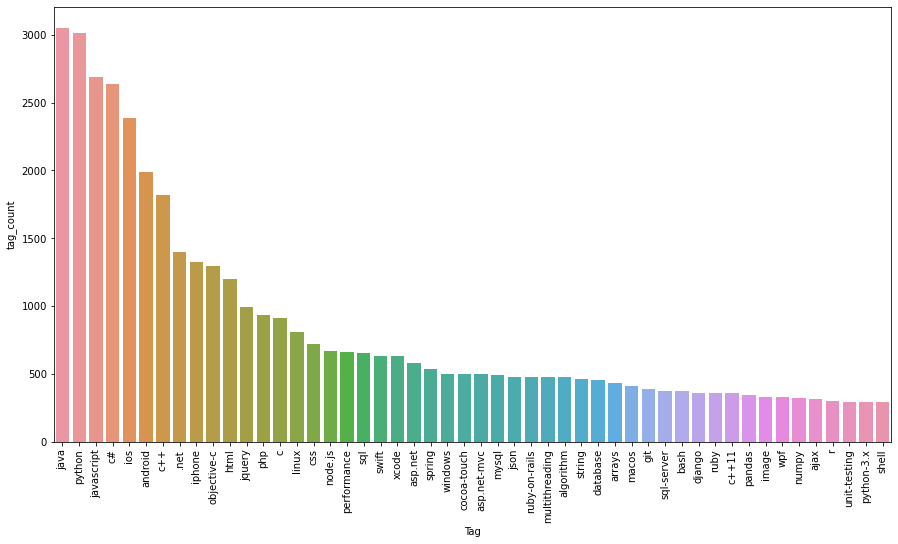

In [9]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:50, :],
            x=tags_list.iloc[0:50, :].index,
            y="tag_count")
plt.xticks(rotation=90)

plt.show()

Langue ?


Longueurs ?


Lien tag/Longueurs 


Sélection supplémentaire (best tags, longueur min/max, titres/text vides ? selection nlangue)



In [10]:
from langdetect import detect
def detect_lang(x):
    try:
        return detect(x)
    except:
        pass


data['short_body'] = data['Body'].apply(lambda x: x[0:100])
data['lang'] = data.short_body.apply(detect_lang)
pd.DataFrame(data.lang.value_counts())


,lang
en,25114
fr,761
ca,256
it,248
ro,136
es,114
da,106
nl,88
pt,86
no,57


In [11]:
data = data[data['lang']=='en']

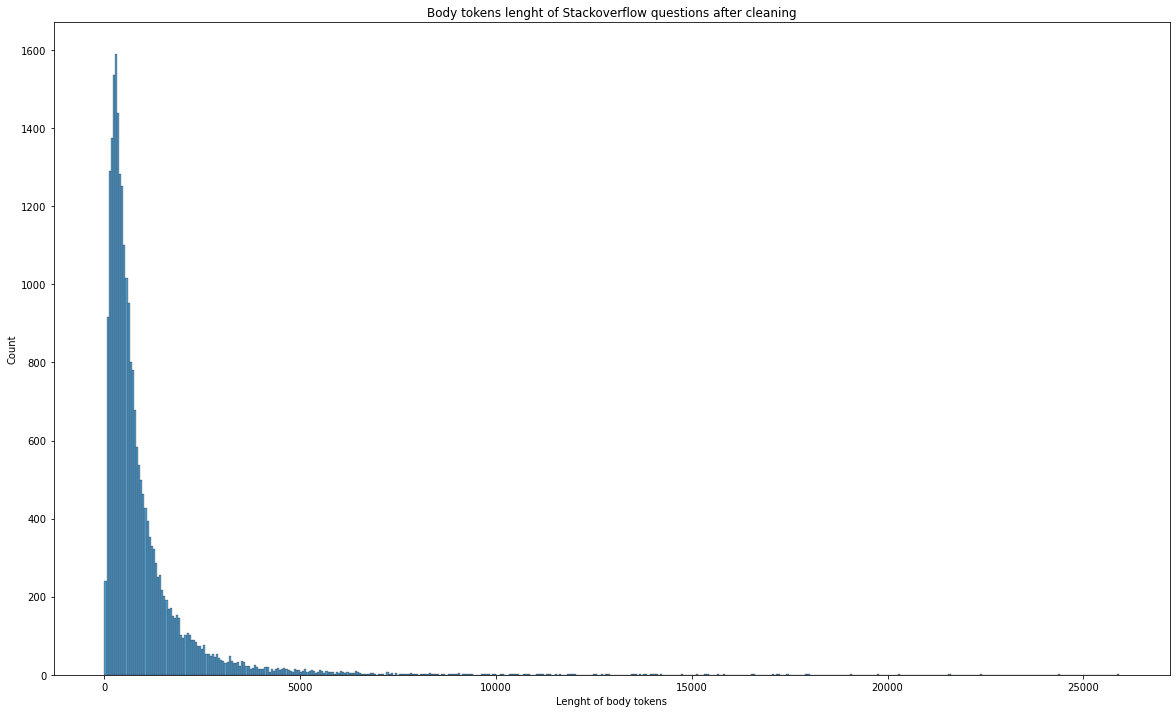

In [12]:
data['body_tokens_count'] = [len(_) for _ in data.Body]

fig = plt.figure(figsize=(20, 12))
ax = sns.histplot(x=data.body_tokens_count)

ax.set_xlabel("Lenght of body tokens")
plt.title("Body tokens lenght of Stackoverflow questions after cleaning")

plt.show()

In [13]:
data['body_tokens_count'] .describe()

count    25114.000000
mean       943.698216
std       1266.793300
min          8.000000
25%        307.000000
50%        573.000000
75%       1094.000000
max      25907.000000
Name: body_tokens_count, dtype: float64

In [14]:
longest_body = data[data['body_tokens_count']==25907.000000].Body


using dcmtk library reading dicom file image format used medical image processing problem compiling dcmtk source code dcmtk us additional external library zlib tiff libpng libxml2 libiconv know library generated code generation options. 've downloaded compiled version support library compiled multithreaded dll runtime option project dcmtk source code ensured runtime option multithreaded dll but still getting error pre code error 238 error lnk2005 ___iob_func already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmp2pgm error 239 error lnk2005 __lock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmp2pgm error 240 error lnk2005 __unlock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmp2pgm error 241 error lnk2005 __initterm_e already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmp2pgm error 242 error lnk2005 _exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmp2pgm error 243 error lnk2005 __exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmp2pgm error 244 error lnk2005 __cexit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmp2pgm error 245 error lnk2005 __amsg_exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmp2pgm error 246 error lnk2005 _fflush already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib fflush.obj dcmp2pgm error 247 error lnk2005 __errno already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib dosmap.obj dcmp2pgm error 248 error lnk2005 __invoke_watson already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib invarg.obj dcmp2pgm error 249 error lnk2005 void __cdecl terminate void terminate yaxxz already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib hooks.obj dcmp2pgm error 250 error lnk2005 ___xi_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmp2pgm error 251 error lnk2005 ___xi_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmp2pgm error 252 error lnk2005 ___xc_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmp2pgm error 253 error lnk2005 ___xc_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmp2pgm error 254 error lnk2005 __unlock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmp2pgm error 255 error lnk2005 __lock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmp2pgm error 256 error lnk2005 __xcptfilter already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib winxfltr.obj dcmp2pgm error 257 error lnk2005 _maincrtstartup already defined msvcrt.lib crtexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0.obj dcmp2pgm error 258 error lnk2005 ___set_app_type already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib errmode.obj dcmp2pgm error 259 error lnk2005 __configthreadlocale already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib setlocal.obj dcmp2pgm error 260 error lnk2005 _getenv already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib getenv.obj dcmp2pgm error 261 error lnk2005 __isctype already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib isctype.obj dcmp2pgm error 262 error lnk2005 __strnicmp already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib strnicmp.obj dcmp2pgm error 263 error lnk2005 __close already defined libcmt.lib close.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 264 error lnk2005 __fileno already defined libcmt.lib fileno.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 265 error lnk2005 _calloc already defined libcmt.lib calloc.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 266 error lnk2005 _atol already defined libcmt.lib atox.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 267 error lnk2005 _strcspn already defined libcmt.lib strcspn.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 268 error lnk2005 __stricmp already defined libcmt.lib stricmp.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 269 error lnk2005 _atoi already defined libcmt.lib atox.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 270 error lnk2005 __lseek already defined libcmt.lib lseek.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 271 error lnk2005 __read already defined libcmt.lib read.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 272 error lnk2005 __write already defined libcmt.lib write.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 273 error lnk2005 __open already defined libcmt.lib open.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 274 error lnk2005 __get_osfhandle already defined libcmt.lib osfinfo.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmp2pgm error 278 error lnk1169 one multiply defined symbol found \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\release\dcmp2pgm.exe dcmp2pgm error 201 error lnk2005 ___iob_func already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmprscp error 202 error lnk2005 __lock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmprscp error 203 error lnk2005 __unlock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmprscp error 204 error lnk2005 __initterm_e already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscp error 205 error lnk2005 _exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscp error 206 error lnk2005 __exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscp error 207 error lnk2005 __cexit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscp error 208 error lnk2005 __amsg_exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscp error 209 error lnk2005 _fflush already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib fflush.obj dcmprscp error 210 error lnk2005 __errno already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib dosmap.obj dcmprscp error 211 error lnk2005 __invoke_watson already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib invarg.obj dcmprscp error 212 error lnk2005 void __cdecl terminate void terminate yaxxz already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib hooks.obj dcmprscp error 213 error lnk2005 ___xi_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscp error 214 error lnk2005 ___xi_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscp error 215 error lnk2005 ___xc_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscp error 216 error lnk2005 ___xc_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscp error 217 error lnk2005 __unlock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmprscp error 218 error lnk2005 __lock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmprscp error 219 error lnk2005 __xcptfilter already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib winxfltr.obj dcmprscp error 220 error lnk2005 __stricmp already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib stricmp.obj dcmprscp error 221 error lnk2005 _maincrtstartup already defined msvcrt.lib crtexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0.obj dcmprscp error 222 error lnk2005 ___set_app_type already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib errmode.obj dcmprscp error 223 error lnk2005 __configthreadlocale already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib setlocal.obj dcmprscp error 224 error lnk2005 _getenv already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib getenv.obj dcmprscp error 225 error lnk2005 __isctype already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib isctype.obj dcmprscp error 226 error lnk2005 __strnicmp already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib strnicmp.obj dcmprscp error 227 error lnk2005 __close already defined libcmt.lib close.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscp error 228 error lnk2005 __fileno already defined libcmt.lib fileno.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscp error 229 error lnk2005 __lseek already defined libcmt.lib lseek.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscp error 230 error lnk2005 __read already defined libcmt.lib read.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscp error 231 error lnk2005 __write already defined libcmt.lib write.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscp error 232 error lnk2005 __open already defined libcmt.lib open.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscp error 233 error lnk2005 __get_osfhandle already defined libcmt.lib osfinfo.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscp error 237 error lnk1169 one multiply defined symbol found \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\release\dcmprscp.exe dcmprscp error 160 error lnk2005 ___iob_func already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmprscu error 161 error lnk2005 __lock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmprscu error 162 error lnk2005 __unlock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmprscu error 163 error lnk2005 __initterm_e already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscu error 164 error lnk2005 _exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscu error 165 error lnk2005 __exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscu error 166 error lnk2005 __cexit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscu error 167 error lnk2005 __amsg_exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmprscu error 168 error lnk2005 _fflush already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib fflush.obj dcmprscu error 169 error lnk2005 __errno already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib dosmap.obj dcmprscu error 170 error lnk2005 __invoke_watson already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib invarg.obj dcmprscu error 171 error lnk2005 void __cdecl terminate void terminate yaxxz already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib hooks.obj dcmprscu error 172 error lnk2005 ___xi_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscu error 173 error lnk2005 ___xi_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscu error 174 error lnk2005 ___xc_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscu error 175 error lnk2005 ___xc_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmprscu error 176 error lnk2005 __unlock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmprscu error 177 error lnk2005 __lock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmprscu error 178 error lnk2005 __xcptfilter already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib winxfltr.obj dcmprscu error 179 error lnk2005 _maincrtstartup already defined msvcrt.lib crtexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0.obj dcmprscu error 180 error lnk2005 ___set_app_type already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib errmode.obj dcmprscu error 181 error lnk2005 __configthreadlocale already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib setlocal.obj dcmprscu error 182 error lnk2005 _getenv already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib getenv.obj dcmprscu error 183 error lnk2005 __isctype already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib isctype.obj dcmprscu error 184 error lnk2005 __strnicmp already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib strnicmp.obj dcmprscu error 185 error lnk2005 __close already defined libcmt.lib close.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 186 error lnk2005 __fileno already defined libcmt.lib fileno.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 187 error lnk2005 _calloc already defined libcmt.lib calloc.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 188 error lnk2005 _atol already defined libcmt.lib atox.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 189 error lnk2005 _strcspn already defined libcmt.lib strcspn.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 190 error lnk2005 __stricmp already defined libcmt.lib stricmp.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 191 error lnk2005 _atoi already defined libcmt.lib atox.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 192 error lnk2005 __lseek already defined libcmt.lib lseek.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 193 error lnk2005 __read already defined libcmt.lib read.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 194 error lnk2005 __write already defined libcmt.lib write.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 195 error lnk2005 __open already defined libcmt.lib open.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 196 error lnk2005 __get_osfhandle already defined libcmt.lib osfinfo.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmprscu error 200 error lnk1169 one multiply defined symbol found \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\release\dcmprscu.exe dcmprscu error 119 error lnk2005 ___iob_func already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmpsprt error 120 error lnk2005 __lock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmpsprt error 121 error lnk2005 __unlock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib _file.obj dcmpsprt error 122 error lnk2005 __initterm_e already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmpsprt error 123 error lnk2005 _exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmpsprt error 124 error lnk2005 __exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmpsprt error 125 error lnk2005 __cexit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmpsprt error 126 error lnk2005 __amsg_exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0dat.obj dcmpsprt error 127 error lnk2005 _fflush already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib fflush.obj dcmpsprt error 128 error lnk2005 __errno already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib dosmap.obj dcmpsprt error 129 error lnk2005 __invoke_watson already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib invarg.obj dcmpsprt error 130 error lnk2005 void __cdecl terminate void terminate yaxxz already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib hooks.obj dcmpsprt error 131 error lnk2005 ___xi_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmpsprt error 132 error lnk2005 ___xi_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmpsprt error 133 error lnk2005 ___xc_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmpsprt error 134 error lnk2005 ___xc_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0init.obj dcmpsprt error 135 error lnk2005 __unlock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmpsprt error 136 error lnk2005 __lock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib mlock.obj dcmpsprt error 137 error lnk2005 __xcptfilter already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib winxfltr.obj dcmpsprt error 138 error lnk2005 _maincrtstartup already defined msvcrt.lib crtexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib crt0.obj dcmpsprt error 139 error lnk2005 ___set_app_type already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib errmode.obj dcmpsprt error 140 error lnk2005 __configthreadlocale already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib setlocal.obj dcmpsprt error 141 error lnk2005 _getenv already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib getenv.obj dcmpsprt error 142 error lnk2005 __isctype already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib isctype.obj dcmpsprt error 143 error lnk2005 __strnicmp already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\libcmt.lib strnicmp.obj dcmpsprt error 144 error lnk2005 __close already defined libcmt.lib close.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 145 error lnk2005 __fileno already defined libcmt.lib fileno.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 146 error lnk2005 _calloc already defined libcmt.lib calloc.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 147 error lnk2005 _atol already defined libcmt.lib atox.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 148 error lnk2005 _strcspn already defined libcmt.lib strcspn.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 149 error lnk2005 __stricmp already defined libcmt.lib stricmp.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 150 error lnk2005 _atoi already defined libcmt.lib atox.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 151 error lnk2005 __lseek already defined libcmt.lib lseek.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 152 error lnk2005 __read already defined libcmt.lib read.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 153 error lnk2005 __write already defined libcmt.lib write.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 154 error lnk2005 __open already defined libcmt.lib open.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 155 error lnk2005 __get_osfhandle already defined libcmt.lib osfinfo.obj \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\msvcrt.lib msvcr100.dll dcmpsprt error 159 error lnk1169 one multiply defined symbol found \dcmtk 3.5.4 src\cmakebinaries\dcmpstat\apps\release\dcmpsprt.exe dcmpsprt error error lnk2005 ___iob_func already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib _file.obj dsr2html error error lnk2005 __lock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib _file.obj dsr2html error error lnk2005 __unlock_file already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib _file.obj dsr2html error error lnk2005 __initterm_e already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0dat.obj dsr2html error error lnk2005 _exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0dat.obj dsr2html error error lnk2005 __exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0dat.obj dsr2html error error lnk2005 __cexit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0dat.obj dsr2html error error lnk2005 __amsg_exit already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0dat.obj dsr2html error error lnk2005 _fflush already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib fflush.obj dsr2html error error lnk2005 __errno already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib dosmap.obj dsr2html error error lnk2005 __invoke_watson already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib invarg.obj dsr2html error error lnk2005 void __cdecl terminate void terminate yaxxz already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib hooks.obj dsr2html error error lnk2005 ___xi_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0init.obj dsr2html error error lnk2005 ___xi_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0init.obj dsr2html error error lnk2005 ___xc_a already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0init.obj dsr2html error error lnk2005 ___xc_z already defined msvcrt.lib cinitexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0init.obj dsr2html error error lnk2005 __unlock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib mlock.obj dsr2html error error lnk2005 __lock already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib mlock.obj dsr2html error error lnk2005 __xcptfilter already defined msvcrt.lib msvcr100.dll \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib winxfltr.obj dsr2html error error lnk2005 _maincrtstartup already defined msvcrt.lib crtexe.obj \dcmtk 3.5.4 src\cmakebinaries\dcmsr\apps\libcmt.lib crt0.obj dsr2html error error lnk2005 ___set_app_type already defined code pre strong edit strong observation there conflict libcmt.lib amp msvcrt.lib these two lib file n't exist location shown errors. strong edit2 strong yes problem support library n't built built support library problem solved.

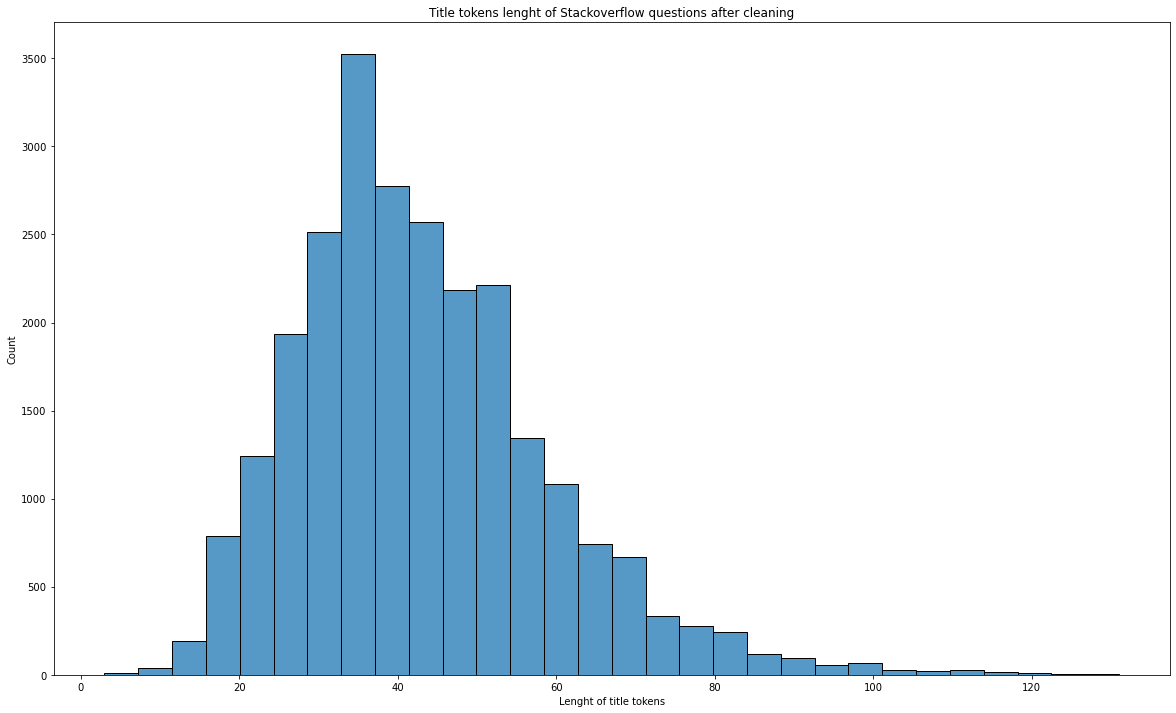

In [15]:
data['title_tokens_count'] = [len(_) for _ in data.Title]

fig = plt.figure(figsize=(20, 12))
ax = sns.histplot(x=data.title_tokens_count, bins = 30)

ax.set_xlabel("Lenght of title tokens")
plt.title("Title tokens lenght of Stackoverflow questions after cleaning")

plt.show()

In [16]:
data=data[data['body_tokens_count']<3000]

In [17]:
data.to_csv("StackOverflow_clean_01.csv")